In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import preprocessing
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from math import log10, sqrt 
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
train_path = 'C:\\Users\\evrn_\\Desktop\\cnn\\train'
valid_path = 'C:\\Users\\evrn_\\Desktop\\cnn\\valid'
test_path = 'C:\\Users\\evrn_\\Desktop\\cnn\\test'

In [3]:
train_batches = ImageDataGenerator().flow_from_directory(train_path, target_size=(28,28),batch_size=3674)
valid_batches = ImageDataGenerator().flow_from_directory(valid_path, target_size=(28,28))
test_batches = ImageDataGenerator().flow_from_directory(test_path, target_size=(28,28))

Found 3674 images belonging to 1 classes.
Found 32 images belonging to 1 classes.
Found 32 images belonging to 1 classes.


In [4]:
train_imgs, train_labels = next(train_batches)
test_imgs, test_labels = next(test_batches)
valid_imgs, valid_labels = next(valid_batches)

In [5]:
print(len(train_imgs[0][0][0]))
print(train_imgs[0][0][0])
print(train_imgs.size)

3
[197. 197. 197.]
8641248


In [6]:
x_train = train_imgs.astype('float32') / 255.
x_test = test_imgs.astype('float32') / 255.


###############################
x_train = np.reshape(x_train, (len(x_train), 28, 28, 3))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 3))  # adapt this if using `channels_first` image data format

In [7]:
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

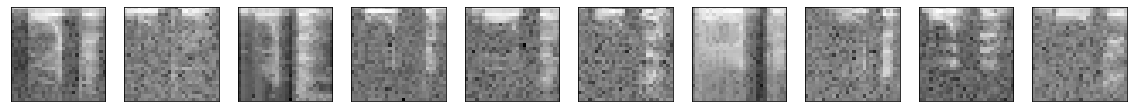

In [8]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(x_train[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

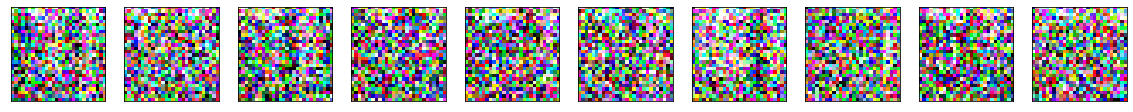

In [9]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(x_train_noisy[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [10]:
#################################
input_img = Input(shape=(28, 28, 3))  # adapt this if using `channels_first` image data format

x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (7, 7, 32)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
##################################
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [11]:
autoencoder.fit(x_train_noisy, x_train,
                epochs=400,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test)
                )

Train on 3674 samples, validate on 32 samples
Epoch 1/400
3674/3674 [==============================] - 12s 3ms/step - loss: 0.6850 - val_loss: 0.6880
Epoch 2/400
3674/3674 [==============================] - 12s 3ms/step - loss: 0.6783 - val_loss: 0.6787
Epoch 3/400
3674/3674 [==============================] - 13s 3ms/step - loss: 0.6759 - val_loss: 0.6780
Epoch 4/400
3674/3674 [==============================] - 12s 3ms/step - loss: 0.6754 - val_loss: 0.6756
Epoch 5/400
3674/3674 [==============================] - 12s 3ms/step - loss: 0.6735 - val_loss: 0.6782
Epoch 6/400
3674/3674 [==============================] - 12s 3ms/step - loss: 0.6725 - val_loss: 0.6778
Epoch 7/400
3674/3674 [==============================] - 14s 4ms/step - loss: 0.6711 - val_loss: 0.6720
Epoch 8/400
3674/3674 [==============================] - 13s 3ms/step - loss: 0.6705 - val_loss: 0.6713
Epoch 9/400
3674/3674 [==============================] - 12s 3ms/step - loss: 0.6693 - val_loss: 0.6702
Epoch 10/400
3674/

3674/3674 [==============================] - 11s 3ms/step - loss: 0.6592 - val_loss: 0.6655
Epoch 79/400
3674/3674 [==============================] - 11s 3ms/step - loss: 0.6592 - val_loss: 0.6667
Epoch 80/400
3674/3674 [==============================] - 11s 3ms/step - loss: 0.6593 - val_loss: 0.6661
Epoch 81/400
3674/3674 [==============================] - 11s 3ms/step - loss: 0.6592 - val_loss: 0.6670
Epoch 82/400
3674/3674 [==============================] - 11s 3ms/step - loss: 0.6593 - val_loss: 0.6649
Epoch 83/400
3674/3674 [==============================] - 12s 3ms/step - loss: 0.6591 - val_loss: 0.6652
Epoch 84/400
3674/3674 [==============================] - 12s 3ms/step - loss: 0.6592 - val_loss: 0.6648
Epoch 85/400
3674/3674 [==============================] - 12s 3ms/step - loss: 0.6592 - val_loss: 0.6656
Epoch 86/400
3674/3674 [==============================] - 12s 3ms/step - loss: 0.6592 - val_loss: 0.6649
Epoch 87/400
3674/3674 [==============================] - 12s 3ms/st

3674/3674 [==============================] - 11s 3ms/step - loss: 0.6582 - val_loss: 0.6642
Epoch 156/400
3674/3674 [==============================] - 11s 3ms/step - loss: 0.6582 - val_loss: 0.6647
Epoch 157/400
3674/3674 [==============================] - 11s 3ms/step - loss: 0.6582 - val_loss: 0.6646
Epoch 158/400
3674/3674 [==============================] - 11s 3ms/step - loss: 0.6582 - val_loss: 0.6653
Epoch 159/400
3674/3674 [==============================] - 11s 3ms/step - loss: 0.6581 - val_loss: 0.6642
Epoch 160/400
3674/3674 [==============================] - 11s 3ms/step - loss: 0.6582 - val_loss: 0.6646
Epoch 161/400
3674/3674 [==============================] - 11s 3ms/step - loss: 0.6582 - val_loss: 0.6643
Epoch 162/400
3674/3674 [==============================] - 11s 3ms/step - loss: 0.6581 - val_loss: 0.6652
Epoch 163/400
3674/3674 [==============================] - 11s 3ms/step - loss: 0.6582 - val_loss: 0.6644
Epoch 164/400
3674/3674 [==============================] - 1

3674/3674 [==============================] - 11s 3ms/step - loss: 0.6576 - val_loss: 0.6643
Epoch 233/400
3674/3674 [==============================] - 11s 3ms/step - loss: 0.6575 - val_loss: 0.6639
Epoch 234/400
3674/3674 [==============================] - 11s 3ms/step - loss: 0.6574 - val_loss: 0.6641
Epoch 235/400
3674/3674 [==============================] - 11s 3ms/step - loss: 0.6575 - val_loss: 0.6641
Epoch 236/400
3674/3674 [==============================] - 11s 3ms/step - loss: 0.6574 - val_loss: 0.6639
Epoch 237/400
3674/3674 [==============================] - 11s 3ms/step - loss: 0.6573 - val_loss: 0.6637
Epoch 238/400
3674/3674 [==============================] - 11s 3ms/step - loss: 0.6576 - val_loss: 0.6641
Epoch 239/400
3674/3674 [==============================] - 11s 3ms/step - loss: 0.6575 - val_loss: 0.6645
Epoch 240/400
3674/3674 [==============================] - 11s 3ms/step - loss: 0.6574 - val_loss: 0.6650
Epoch 241/400
3674/3674 [==============================] - 1

3674/3674 [==============================] - 11s 3ms/step - loss: 0.6572 - val_loss: 0.6640
Epoch 310/400
3674/3674 [==============================] - 11s 3ms/step - loss: 0.6572 - val_loss: 0.6639
Epoch 311/400
3674/3674 [==============================] - 11s 3ms/step - loss: 0.6571 - val_loss: 0.6636
Epoch 312/400
3674/3674 [==============================] - 11s 3ms/step - loss: 0.6572 - val_loss: 0.6637
Epoch 313/400
3674/3674 [==============================] - 11s 3ms/step - loss: 0.6572 - val_loss: 0.6634
Epoch 314/400
3674/3674 [==============================] - 11s 3ms/step - loss: 0.6570 - val_loss: 0.6640
Epoch 315/400
3674/3674 [==============================] - 12s 3ms/step - loss: 0.6572 - val_loss: 0.6637
Epoch 316/400
3674/3674 [==============================] - 12s 3ms/step - loss: 0.6572 - val_loss: 0.6640
Epoch 317/400
3674/3674 [==============================] - 11s 3ms/step - loss: 0.6573 - val_loss: 0.6637
Epoch 318/400
3674/3674 [==============================] - 1

3674/3674 [==============================] - 11s 3ms/step - loss: 0.6569 - val_loss: 0.6633
Epoch 387/400
3674/3674 [==============================] - 13s 3ms/step - loss: 0.6567 - val_loss: 0.6639
Epoch 388/400
3674/3674 [==============================] - 13s 3ms/step - loss: 0.6569 - val_loss: 0.6633
Epoch 389/400
3674/3674 [==============================] - 12s 3ms/step - loss: 0.6569 - val_loss: 0.6637
Epoch 390/400
3674/3674 [==============================] - 11s 3ms/step - loss: 0.6568 - val_loss: 0.6636
Epoch 391/400
3674/3674 [==============================] - 12s 3ms/step - loss: 0.6569 - val_loss: 0.6633
Epoch 392/400
3674/3674 [==============================] - 12s 3ms/step - loss: 0.6568 - val_loss: 0.6639
Epoch 393/400
3674/3674 [==============================] - 12s 3ms/step - loss: 0.6569 - val_loss: 0.6633
Epoch 394/400
3674/3674 [==============================] - 11s 3ms/step - loss: 0.6568 - val_loss: 0.6636
Epoch 395/400
3674/3674 [==============================] - 1

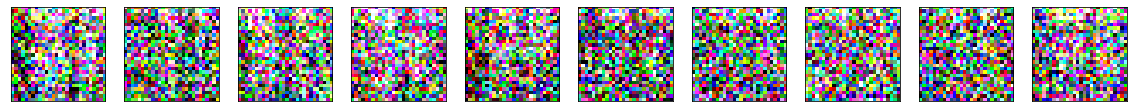

In [12]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(x_test_noisy[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [13]:
decoded_imgs = autoencoder.predict(x_test_noisy)

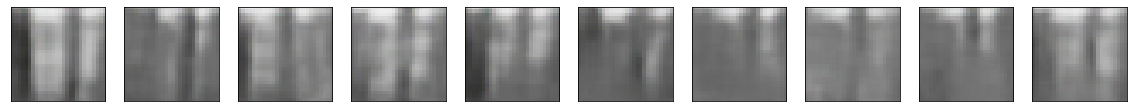

In [14]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(decoded_imgs[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

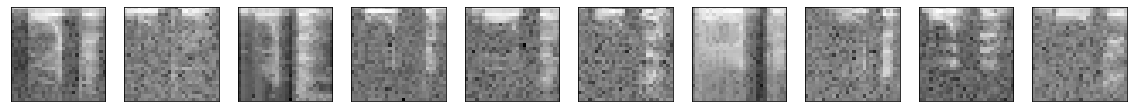

In [15]:
 n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(x_train[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [16]:
def PSNR(original, compresed): 
    mse = np.mean((original - compressed) ** 2) 
    if(mse == 0):  # MSE is zero means no noise is present in the signal . 
                  # Therefore PSNR have no importance. 
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse)) 
    return psnr 

In [19]:
n = 10

for i in range(n):
    
    value = PSNR(x_train[i], decoded_imgs[i]) 
    print(f"PSNR value is {value} dB") 

PSNR value is 67.4363881195099 dB
PSNR value is 64.38342173253154 dB
PSNR value is 66.35829943794077 dB
PSNR value is 65.46343702750943 dB
PSNR value is 64.50742662569151 dB
PSNR value is 64.84936948524857 dB
PSNR value is 61.827515007734384 dB
PSNR value is 66.36301143869835 dB
PSNR value is 67.44470924680425 dB
PSNR value is 67.13551442621184 dB
